# US Baby Names 1880-2010

In [1]:
import numpy as np
import os
from pandas import Series, DataFrame
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
names=['Name', 'sex', 'births', 'year']
#for year in range(1880, 2011, 1):
year = 1880
Names = pd.read_csv(r'names\yob{}.txt'.format(year),sep=',', names=names) 
Names['year'] = year


In [3]:
Names.head(10)

,Name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [4]:
print(Names.head(10).to_latex())

\begin{tabular}{lllrr}
\toprule
{} &       Name & sex &  births &  year \\
\midrule
0 &       Mary &   F &    7065 &  1880 \\
1 &       Anna &   F &    2604 &  1880 \\
2 &       Emma &   F &    2003 &  1880 \\
3 &  Elizabeth &   F &    1939 &  1880 \\
4 &     Minnie &   F &    1746 &  1880 \\
5 &   Margaret &   F &    1578 &  1880 \\
6 &        Ida &   F &    1472 &  1880 \\
7 &      Alice &   F &    1414 &  1880 \\
8 &     Bertha &   F &    1320 &  1880 \\
9 &      Sarah &   F &    1288 &  1880 \\
\bottomrule
\end{tabular}



In [5]:
conda install posix

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [6]:
!head -n 10 names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [7]:
import pandas as pd

In [8]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [9]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [10]:
print(names1880.head().to_latex())

\begin{tabular}{lllr}
\toprule
{} &       name & sex &  births \\
\midrule
0 &       Mary &   F &    7065 \\
1 &       Anna &   F &    2604 \\
2 &       Emma &   F &    2003 \\
3 &  Elizabeth &   F &    1939 \\
4 &     Minnie &   F &    1746 \\
\bottomrule
\end{tabular}



In [11]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [12]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
    names = pd.concat(pieces, ignore_index=True)

In [13]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [14]:
print(names.head().to_latex())

\begin{tabular}{lllrr}
\toprule
{} &       name & sex &  births &  year \\
\midrule
0 &       Mary &   F &    7065 &  1880 \\
1 &       Anna &   F &    2604 &  1880 \\
2 &       Emma &   F &    2003 &  1880 \\
3 &  Elizabeth &   F &    1939 &  1880 \\
4 &     Minnie &   F &    1746 &  1880 \\
\bottomrule
\end{tabular}



In [15]:
total_births = names.pivot_table('births','year','sex', aggfunc=sum)

In [16]:
total_births.tail()

sex,F,M
year,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


In [17]:
print(total_births.tail().to_latex())

\begin{tabular}{lrr}
\toprule
sex &        F &        M \\
year &          &          \\
\midrule
2006 &  1900375 &  2054352 \\
2007 &  1921655 &  2074427 \\
2008 &  1889800 &  2038995 \\
2009 &  1835873 &  1982310 \\
2010 &  1776223 &  1917416 \\
\bottomrule
\end{tabular}



In [18]:
def add_prop(group):
 # Integer division floors
 births = group.births.astype(float)
 group['prop'] = births / births.sum()
 return group
names = names.groupby(['year', 'sex']).apply(add_prop)

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

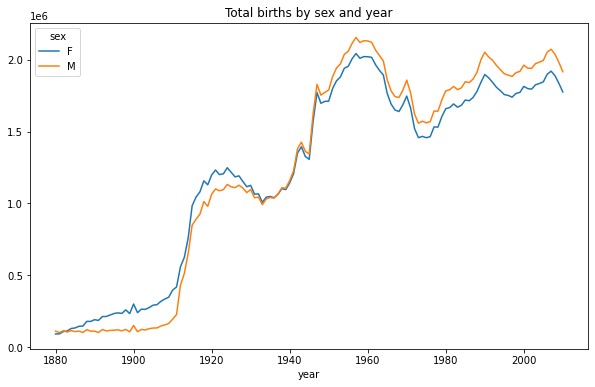

In [19]:
total_births.plot(title='Total births by sex and year')

In [20]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


In [21]:
print(names.head().to_latex())

\begin{tabular}{lllrrr}
\toprule
{} &       name & sex &  births &  year &      prop \\
\midrule
0 &       Mary &   F &    7065 &  1880 &  0.077642 \\
1 &       Anna &   F &    2604 &  1880 &  0.028617 \\
2 &       Emma &   F &    2003 &  1880 &  0.022012 \\
3 &  Elizabeth &   F &    1939 &  1880 &  0.021309 \\
4 &     Minnie &   F &    1746 &  1880 &  0.019188 \\
\bottomrule
\end{tabular}



In [22]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [23]:
def get_top1000(group):
    return group.sort_index(kind='births', ignore_index = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [24]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1679125     Bailey   M     196  2010  0.000102
         1679126     Destin   M     196  2010  0.000102
         1679127    Eliezer   M     196  2010  0.000102
         1679128      Enoch   M     196  2010  0.000102
         1679129     Joziah   M     196  2010  0.000102

[261876 rows x 5 columns]

In [25]:
print(top1000.head().to_latex())

\begin{tabular}{lllllrrr}
\toprule
     &   &   &       name & sex &  births &  year &      prop \\
year & sex & {} &            &     &         &       &           \\
\midrule
1880 & F & 0 &       Mary &   F &    7065 &  1880 &  0.077642 \\
     &   & 1 &       Anna &   F &    2604 &  1880 &  0.028617 \\
     &   & 2 &       Emma &   F &    2003 &  1880 &  0.022012 \\
     &   & 3 &  Elizabeth &   F &    1939 &  1880 &  0.021309 \\
     &   & 4 &     Minnie &   F &    1746 &  1880 &  0.019188 \\
\bottomrule
\end{tabular}



In [26]:
print(top1000.tail().to_latex())

\begin{tabular}{lllllrrr}
\toprule
     &   &         &     name & sex &  births &  year &      prop \\
year & sex & {} &          &     &         &       &           \\
\midrule
2010 & M & 1679125 &   Bailey &   M &     196 &  2010 &  0.000102 \\
     &   & 1679126 &   Destin &   M &     196 &  2010 &  0.000102 \\
     &   & 1679127 &  Eliezer &   M &     196 &  2010 &  0.000102 \\
     &   & 1679128 &    Enoch &   M &     196 &  2010 &  0.000102 \\
     &   & 1679129 &   Joziah &   M &     196 &  2010 &  0.000102 \\
\bottomrule
\end{tabular}



In [27]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(kind='births', ignore_index = False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [28]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [29]:
print(top1000.head().to_latex())

\begin{tabular}{lllrrr}
\toprule
{} &       name & sex &  births &  year &      prop \\
\midrule
0 &       Mary &   F &    7065 &  1880 &  0.077642 \\
1 &       Anna &   F &    2604 &  1880 &  0.028617 \\
2 &       Emma &   F &    2003 &  1880 &  0.022012 \\
3 &  Elizabeth &   F &    1939 &  1880 &  0.021309 \\
4 &     Minnie &   F &    1746 &  1880 &  0.019188 \\
\bottomrule
\end{tabular}



### Analyzing Naming Trends

In [30]:
boys = top1000[top1000.sex == 'M']

In [31]:
girls = top1000[top1000.sex == 'F']
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [32]:
total_births = top1000.pivot_table('births','year','name',aggfunc=sum)

In [33]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,5.0,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,5.0,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,5.0,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3745.0,NaN,8302.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2857.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3959.0,NaN,8942.0,NaN,NaN,314.0,NaN,349.0,468.0,...,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,957.0,4042.0,219.0,8542.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3448.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [35]:
print(total_births.head(10).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

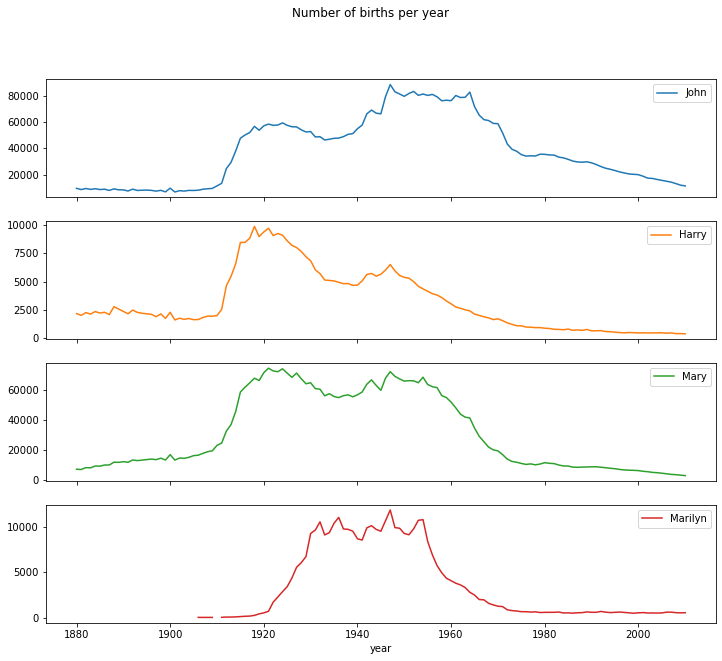

In [36]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

### Measuring the increase in naming diversity

In [37]:
table = top1000.pivot_table('prop', 'year','sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

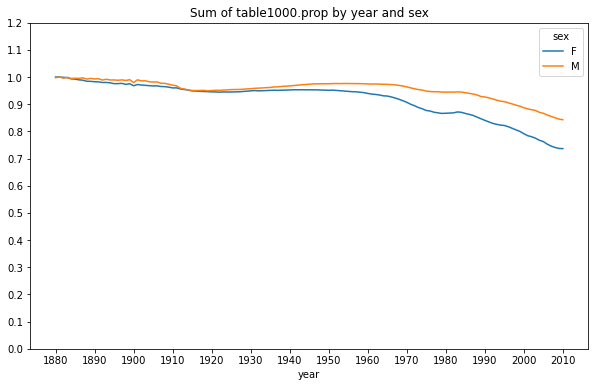

In [38]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020, 10))

In [39]:
df = boys[boys.year == 2010]

In [40]:
df

,name,sex,births,year,prop
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [41]:
print(df.head(10).to_latex())

\begin{tabular}{lllrrr}
\toprule
{} &       name & sex &  births &  year &      prop \\
\midrule
260876 &      Jacob &   M &   22139 &  2010 &  0.011546 \\
260877 &      Ethan &   M &   18008 &  2010 &  0.009392 \\
260878 &    Michael &   M &   17366 &  2010 &  0.009057 \\
260879 &     Jayden &   M &   17191 &  2010 &  0.008966 \\
260880 &    William &   M &   17060 &  2010 &  0.008897 \\
260881 &  Alexander &   M &   16759 &  2010 &  0.008740 \\
260882 &       Noah &   M &   16463 &  2010 &  0.008586 \\
260883 &     Daniel &   M &   15853 &  2010 &  0.008268 \\
260884 &      Aiden &   M &   15544 &  2010 &  0.008107 \\
260885 &    Anthony &   M &   15501 &  2010 &  0.008084 \\
\bottomrule
\end{tabular}



In [42]:
prop_cumsum = df.sort_index(kind='births', ignore_index = False).prop.cumsum()

In [43]:
prop_cumsum[:10]

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065185
260883    0.073453
260884    0.081559
260885    0.089644
Name: prop, dtype: float64

In [44]:
 df = boys[boys.year == 1900]

In [45]:
in1900 = df.sort_index(kind='births', ignore_index = False).prop.cumsum()

In [46]:
in1900.searchsorted(0.5) + 1

25

In [47]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(kind='births', ignore_index = False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [48]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [49]:
print(diversity.head().to_latex())

\begin{tabular}{lrr}
\toprule
sex &   F &   M \\
year &     &     \\
\midrule
1880 &  38 &  14 \\
1881 &  38 &  14 \\
1882 &  38 &  15 \\
1883 &  39 &  15 \\
1884 &  39 &  16 \\
\bottomrule
\end{tabular}



<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

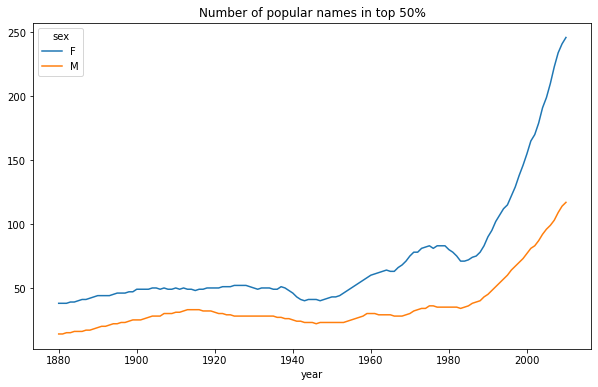

In [50]:
diversity.plot(title="Number of popular names in top 50%")

### The “Last letter” Revolution

In [51]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',last_letters,['sex', 'year'], aggfunc=sum)

In [52]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [53]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [54]:
print(subtable.head().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
sex & \multicolumn{3}{l}{F} & \multicolumn{3}{l}{M} \\
year &      1910 &      1960 &      2010 &     1910 &      1960 &      2010 \\
last\_letter &           &           &           &          &           &           \\
\midrule
a           &  108399.0 &  691285.0 &  677176.0 &    977.0 &    5214.0 &   28888.0 \\
b           &       NaN &     694.0 &     455.0 &    411.0 &    3910.0 &   39298.0 \\
c           &       5.0 &      49.0 &     957.0 &    482.0 &   15456.0 &   23360.0 \\
d           &    6751.0 &    3732.0 &    2645.0 &  22112.0 &  262106.0 &   44856.0 \\
e           &  133601.0 &  435009.0 &  316921.0 &  28665.0 &  178742.0 &  130325.0 \\
\bottomrule
\end{tabular}



In [55]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

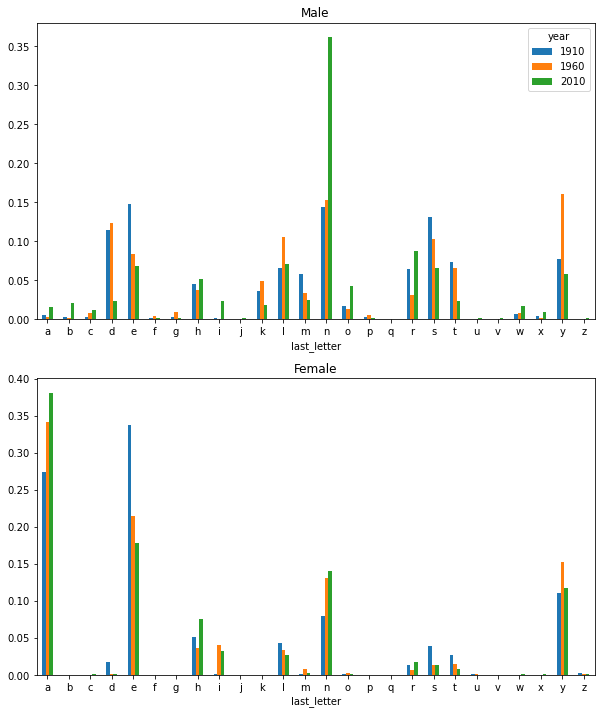

In [56]:
import matplotlib.pyplot as plt
letter_prop = subtable / subtable.sum().astype(float)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [57]:
letter_prop = table / table.sum().astype(float)

In [58]:
import pandas
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [59]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


In [60]:
print(dny_ts.head().to_latex())

\begin{tabular}{lrrr}
\toprule
last\_letter &         d &         n &         y \\
year &           &           &           \\
\midrule
1880 &  0.083057 &  0.153217 &  0.075763 \\
1881 &  0.083246 &  0.153221 &  0.077459 \\
1882 &  0.085332 &  0.149561 &  0.077538 \\
1883 &  0.084053 &  0.151656 &  0.079149 \\
1884 &  0.086122 &  0.149927 &  0.080408 \\
\bottomrule
\end{tabular}



<AxesSubplot:xlabel='year'>

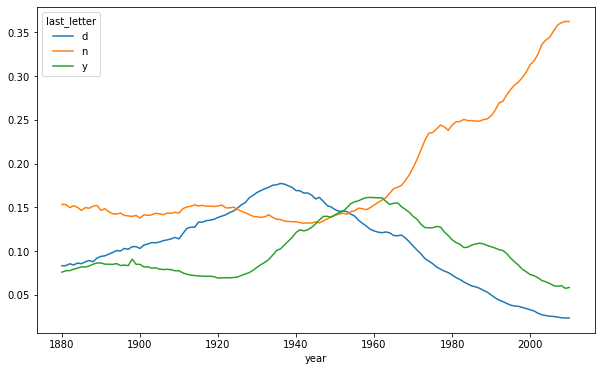

In [61]:
dny_ts.plot()

### Boy names that became girl names (and vice versa)

In [62]:
all_names = top1000.name.unique()

In [63]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [64]:
lesley_like = all_names[mask]

In [65]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [66]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [67]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     34983
Lesli        929
Leslie    370581
Lesly      10072
Name: births, dtype: int64

In [68]:
table = filtered.pivot_table('births','year','sex', aggfunc='sum')

In [69]:
table = table.div(table.sum(1), axis=0)

In [70]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [71]:
print(table.tail().to_latex())

\begin{tabular}{lrr}
\toprule
sex &    F &   M \\
year &      &     \\
\midrule
2006 &  1.0 & NaN \\
2007 &  1.0 & NaN \\
2008 &  1.0 & NaN \\
2009 &  1.0 & NaN \\
2010 &  1.0 & NaN \\
\bottomrule
\end{tabular}



<AxesSubplot:xlabel='year'>

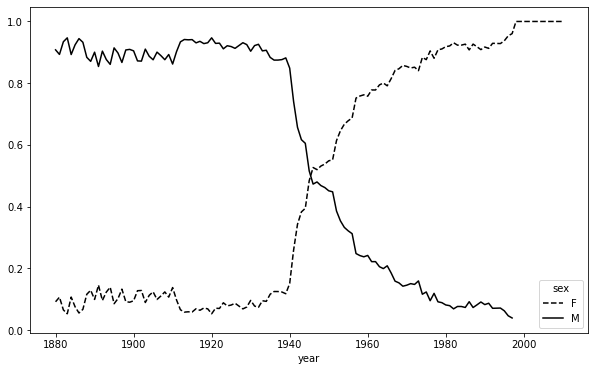

In [72]:
table.plot(style={'M': 'k-', 'F': 'k--'})